<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/UMMLP1/UM_MLIntern_P1(28Jan%20Wed-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1 :: Vehicle Price Prediction

###Step 1: Importing The Lib's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Step 2: Loding the Dataset

In [3]:
file_path='/content/sample_data/Veh Prices Dataset.csv'
df_vpp= pd.read_csv(file_path)

###Step 3: Descriptive Stats

In [4]:
df_vpp.shape

(1002, 17)

In [5]:
df_vpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
df_vpp.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [7]:
df_vpp.describe(include=['int','float'])

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [8]:
df_vpp.describe(include='object')

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,130,664,325,69,704,81,510,461


In [9]:
df_vpp.sample(1).T

,729
name,2024 Toyota RAV4 Prime XSE
description,\n \n This Toyota won't be on the ...
make,Toyota
model,RAV4 Prime
year,2024
price,50209.0
engine,16V PDI DOHC Hybrid
cylinders,4.0
fuel,Hybrid
mileage,0.0


In [10]:
df_vpp[673:674]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
673,2024 Honda CR-V Hybrid Sport-L,\n \n This 2024 Honda CR-V Hybrid ...,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [11]:
df_vpp.duplicated().sum()

np.int64(24)

In [12]:
df_vpp[df_vpp.duplicated()].index#(keep_fitst=True)

Index([ 58,  81, 238, 246, 353, 384, 391, 398, 403, 404, 474, 479, 496, 533,
       548, 585, 637, 657, 716, 717, 835, 879, 906, 998],
      dtype='int64')

In [13]:
dfname=list(set(df_vpp['name'].values.tolist()))
dfname

['2024 Chevrolet Silverado 1500 Custom',
 '2024 Volkswagen Jetta 1.4T SE',
 '2024 Nissan Pathfinder SL 4WD',
 '2024 Jeep Wrangler Rubicon',
 '2024 Kia Niro EX',
 '2024 Ford F-350 Lariat Super Duty',
 '2024 Hyundai Elantra HEV Blue',
 '2024 Chevrolet Silverado 1500 Custom Trail Boss',
 '2024 Cadillac XT5 Premium Luxury',
 '2023 Ford F-150 XLT',
 '2024 Kia Sportage EX',
 '2024 Volvo XC90 Recharge Plug-In Hybrid T8 Plus Bright Theme 7 Passenger',
 '2024 Hyundai IONIQ 5 SE',
 '2024 Mercedes-Benz AMG GLE 53 Base',
 '2024 Subaru Impreza RS',
 '2024 Dodge Hornet R/T Plus',
 '2024 Dodge Hornet GT Plus AWD',
 '2024 Jeep Wrangler 4xe Sahara',
 '2023 Jeep Wrangler 4xe Sahara',
 '2024 Hyundai IONIQ 5 Disney100 Platinum Edition',
 '2024 Ford Maverick Lariat',
 '2024 Toyota Tundra Hybrid 1794 Edition',
 '2024 Jeep Wagoneer L Series II',
 '2024 Volkswagen ID.4 Standard',
 '2024 Hyundai Kona N Line',
 '2024 Cadillac XT5 Luxury',
 '2023 Buick Envision Preferred',
 '2024 Hyundai IONIQ 5 SEL',
 '2024 Kia

In [14]:
df_vpp['name']=df_vpp['name'].astype('str')
df_vpp['first_4_char']=df_vpp['name'].str[:4]
df_vpp['remain_char']=df_vpp['name'].str[4:]

In [15]:
df_vpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
 17  first_4_char    1002 non-null   o

In [16]:
df_vpp[['first_4_char','year']].sample(10).T

,999,885,232,261,235,59,133,766,786,85
first_4_char,2024,2024,2024,2024,2024,2024,2024,2023,2024,2024
year,2024,2024,2024,2024,2024,2024,2024,2023,2024,2024


In [17]:
df_vpp[['first_4_char']].value_counts()

,count
first_4_char,
2024,906
2023,90
2025,6


In [18]:
df_vpp[['year']].value_counts()

,count
year,
2024,906
2023,90
2025,6


##PRE PROCESSING THE DATASET

#### Finding The Max Length of a string in an entire column

In [19]:

# Find the length of the maximum string
name_max_length = df_vpp['description'].str.len().max()

print(f"The maximum string length in the 'description' column is: {name_max_length}")

# Get the index of the longest string
longest_string_index = df_vpp['description'].str.len().idxmax()

print('longest_string_index', longest_string_index)
# Get the longest string value
longest_string = df_vpp['description'][longest_string_index]

print(f"The longest string is: {longest_string}")

The maximum string length in the 'description' column is: 3128.0
longest_string_index 197
The longest string is: 
      
        Bright White Clearcoat 2024 Jeep Grand Cherokee L Laredo 3.6L V6 24V VVT 4WD 115V Auxiliary Power Outlet, 7 & 4 Pin Wiring Harness, Class IV Receiver Hitch, Heated Front Seats, Heated Steering Wheel, Luxury Tech Group I, ParkView Rear Back-Up Camera, Power driver seat, Power Liftgate, Radio: Uconnect 5 w/8.4'' Display, Rain Sensitive Windshield Wipers, Reclining 3rd row seat, Remote keyless entry, Remote Start System, Steering wheel mounted audio controls, Trailer Hitch Zoom, Trailer Tow Package, Wireless Charging Pad.Priced below KBB Fair Purchase Price!Disclaimer: Pricing is inclusive of all applicable manufacturer incentives and may not be combined with other exclusive offers. See dealer for details. New vehicle pricing includes all offers and incentives. Tax, Title, and Tags are not included in the vehicle prices shown and must be paid by the purchasers. 

In [20]:
df_vpp['description'][197]

"\n      \n        Bright White Clearcoat 2024 Jeep Grand Cherokee L Laredo 3.6L V6 24V VVT 4WD 115V Auxiliary Power Outlet, 7 & 4 Pin Wiring Harness, Class IV Receiver Hitch, Heated Front Seats, Heated Steering Wheel, Luxury Tech Group I, ParkView Rear Back-Up Camera, Power driver seat, Power Liftgate, Radio: Uconnect 5 w/8.4'' Display, Rain Sensitive Windshield Wipers, Reclining 3rd row seat, Remote keyless entry, Remote Start System, Steering wheel mounted audio controls, Trailer Hitch Zoom, Trailer Tow Package, Wireless Charging Pad.Priced below KBB Fair Purchase Price!Disclaimer: Pricing is inclusive of all applicable manufacturer incentives and may not be combined with other exclusive offers. See dealer for details. New vehicle pricing includes all offers and incentives. Tax, Title, and Tags are not included in the vehicle prices shown and must be paid by the purchasers. While great efforts are made to ensure the accuracy of the information on this site, errors do occur so please

In [21]:

max_words_row_entire_column= df_vpp['description'].str.split().str.len().max()

#print(f"The DataFrame:\n{df_vpp}\n")
print(f"The maximum number of words in a row in the 'text_column' is: {max_words_row_entire_column=}")

The maximum number of words in a row in the 'text_column' is: max_words_row_entire_column=475.0


####The following Columns have Null values in them

In [22]:
Null_val={'description':56,
'price':23,
'engine':2,
'cylinders':105,
'fuel':7,
'mileage':34,
'transmission':2,
'trim':1,
'body':3,
'doors':7,
'exterior_color':5,
'interior_color':38}

In [ ]:
!pip install --upgrade wordcloud

###Step 3: Handling Null Values

In [23]:
df_vpp[df_vpp['description'].isnull()].index.tolist()

[2,
 8,
 23,
 39,
 58,
 81,
 86,
 89,
 97,
 113,
 121,
 137,
 155,
 216,
 238,
 269,
 291,
 310,
 311,
 313,
 343,
 357,
 362,
 367,
 386,
 387,
 391,
 397,
 420,
 437,
 488,
 520,
 575,
 580,
 589,
 596,
 598,
 638,
 706,
 759,
 765,
 785,
 806,
 807,
 850,
 863,
 877,
 886,
 888,
 898,
 900,
 963,
 975,
 977,
 985,
 987]

In [24]:
df_vpp[df_vpp['price'].isnull()].index.tolist()

[142,
 248,
 283,
 328,
 372,
 417,
 434,
 443,
 500,
 506,
 536,
 541,
 627,
 678,
 683,
 704,
 779,
 809,
 811,
 859,
 876,
 937,
 943]

In [25]:
df_vpp[df_vpp['engine'].isnull()].index.tolist()

[614, 803]

In [26]:
df_vpp[df_vpp['cylinders'].isnull()].index.tolist()

[14,
 28,
 33,
 35,
 49,
 50,
 53,
 62,
 68,
 86,
 100,
 110,
 116,
 121,
 128,
 131,
 142,
 146,
 180,
 191,
 192,
 209,
 210,
 214,
 218,
 219,
 223,
 227,
 239,
 251,
 252,
 253,
 255,
 273,
 287,
 291,
 293,
 307,
 315,
 323,
 328,
 337,
 340,
 347,
 372,
 373,
 384,
 390,
 392,
 393,
 409,
 413,
 419,
 424,
 436,
 447,
 479,
 480,
 481,
 484,
 489,
 490,
 494,
 495,
 499,
 512,
 514,
 522,
 531,
 554,
 555,
 563,
 567,
 573,
 582,
 586,
 590,
 598,
 604,
 610,
 613,
 630,
 632,
 661,
 681,
 725,
 726,
 728,
 737,
 742,
 743,
 747,
 752,
 764,
 767,
 777,
 813,
 839,
 866,
 883,
 884,
 893,
 941,
 944,
 978]

In [27]:
df_vpp[df_vpp['fuel'].isnull()].index.tolist()

[128, 219, 315, 489, 490, 610, 726]

In [28]:
df_vpp[df_vpp['mileage'].isnull()].index.tolist()

[27,
 47,
 63,
 73,
 84,
 87,
 93,
 177,
 217,
 219,
 225,
 234,
 261,
 262,
 365,
 399,
 461,
 476,
 489,
 490,
 503,
 594,
 596,
 607,
 628,
 629,
 801,
 847,
 879,
 885,
 906,
 916,
 922,
 980]

In [29]:
df_vpp[df_vpp['transmission'].isnull()].index.tolist()

[725, 940]

In [30]:
df_vpp[df_vpp['trim'].isnull()].index.tolist()

[805]

In [31]:
df_vpp[df_vpp['body'].isnull()].index.tolist()

[164, 235, 687]

In [32]:
df_vpp[df_vpp['doors'].isnull()].index.tolist()

[124, 190, 215, 610, 614, 857, 893]

In [33]:
df_vpp[df_vpp['exterior_color'].isnull()].index.tolist()

[117, 137, 373, 608, 612]

In [34]:
df_vpp[df_vpp['interior_color'].isnull()].index.tolist()

[44,
 48,
 71,
 77,
 134,
 137,
 161,
 169,
 245,
 286,
 407,
 414,
 416,
 443,
 446,
 452,
 454,
 466,
 478,
 480,
 582,
 608,
 612,
 673,
 675,
 708,
 741,
 771,
 790,
 812,
 819,
 824,
 844,
 853,
 858,
 940,
 967,
 971]

In [35]:
idx=df_vpp[df_vpp['engine'].str.contains('DOHC', na=False)].index
print(len(idx))#691
print(1002-691)
print(idx.tolist())

691
311
[0, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 34, 37, 38, 39, 41, 42, 43, 45, 47, 48, 51, 52, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 80, 82, 83, 85, 87, 88, 89, 91, 92, 93, 96, 99, 101, 102, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 120, 123, 124, 125, 126, 127, 129, 130, 132, 133, 135, 136, 138, 139, 140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 170, 171, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 193, 194, 198, 199, 200, 202, 204, 206, 207, 211, 212, 213, 215, 216, 217, 220, 221, 222, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 243, 244, 250, 256, 257, 258, 260, 261, 262, 263, 265, 266, 267, 270, 274, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 288, 294, 295, 298, 300, 301, 302, 304, 305, 306, 309, 310, 311, 312, 316, 318, 319, 320, 321, 322, 32

###Creating a Seperate copy of DataFrame

In [36]:
dfvpp_cpy=df_vpp.copy(deep=True)
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
 17  first_4_char    1002 non-null   o

In [37]:
dfvpp_cpy.shape

(1002, 19)

In [38]:
Null_val={'description':56,
'price':23,
'engine':2,
'cylinders':105,
'fuel':7,
'mileage':34,
'transmission':2,
'trim':1,
'body':3,
'doors':7,
'exterior_color':5,
'interior_color':38}

In [39]:
icdict=dict(dfvpp_cpy['interior_color'].value_counts())
icdict

{'Black': np.int64(510),
 'Global Black': np.int64(84),
 'Gray': np.int64(77),
 'Jet Black': np.int64(45),
 'Ebony': np.int64(43),
 'Charcoal': np.int64(29),
 'Black Onyx': np.int64(16),
 'Titan Black': np.int64(11),
 'Diesel Gray/Black': np.int64(6),
 'Graphite': np.int64(6),
 'Black Interior Color': np.int64(6),
 'Greige': np.int64(6),
 'Medium Ash Gray': np.int64(5),
 'Beige / Black': np.int64(5),
 'Medium Gray': np.int64(5),
 'Dark Gray': np.int64(4),
 'Pebble Gray': np.int64(3),
 'Beige': np.int64(3),
 'White': np.int64(3),
 'Dk Palazzo Gry Fron': np.int64(3),
 'Okapi Brown': np.int64(3),
 'Ruby Red/Black': np.int64(3),
 'Red': np.int64(3),
 'Tacora Red': np.int64(3),
 'Jet Blk': np.int64(2),
 'Cognac': np.int64(2),
 'Teak/Light Shale': np.int64(2),
 'Noir w/Santorini Blue Accents': np.int64(2),
 'Nh-731p/Black': np.int64(2),
 'Tupelo': np.int64(2),
 'Pearl Beige': np.int64(2),
 'Jet Blk Premium Clth': np.int64(2),
 'Dark Palazzo Gray': np.int64(2),
 'Macchiato Beige': np.int64(2)

In [40]:
dfvpp_cpy.describe(include='object')

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain,first_4_char,remain_char
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002,1002,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4,3,337
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive,2024,Dodge Durango Pursuit
freq,33,13,194,65,130,664,325,69,704,81,510,461,906,35


###Convert Object to String Data Type

In [41]:
dfvpp_cpy['name']=dfvpp_cpy['name'].astype("string")

In [42]:
dfvpp_cpy['description']=dfvpp_cpy['description'].astype("string")

In [43]:
dfvpp_cpy['make']=dfvpp_cpy['make'].astype("string")

In [44]:
dfvpp_cpy['model']=dfvpp_cpy['model'].astype("string")

In [45]:
dfvpp_cpy['engine']=dfvpp_cpy['engine'].astype("string")

In [46]:
dfvpp_cpy['fuel']=dfvpp_cpy['fuel'].astype("string")

In [47]:
dfvpp_cpy['transmission']=dfvpp_cpy['transmission'].astype("string")

In [48]:
dfvpp_cpy['trim']=dfvpp_cpy['trim'].astype("string")

In [49]:
dfvpp_cpy['exterior_color']=dfvpp_cpy['exterior_color'].astype("string")

In [50]:
dfvpp_cpy['interior_color']=dfvpp_cpy['interior_color'].astype("string")

------

In [51]:
dfvpp_cpy['body']=dfvpp_cpy['body'].astype("string")

In [52]:
dfvpp_cpy['drivetrain']=dfvpp_cpy['drivetrain'].astype("string")

###Filling Missing Values

In [53]:
dfvpp_cpy['description'].fillna(dfvpp_cpy['description'].mode()[0], inplace=True)

In [54]:
dfvpp_cpy['price'].fillna(dfvpp_cpy['price'].mean(), inplace=True)

In [55]:
dfvpp_cpy['engine'].fillna(dfvpp_cpy['engine'].mode()[0], inplace=True)

In [56]:
dfvpp_cpy['cylinders'].fillna(dfvpp_cpy['cylinders'].mean(), inplace=True)

In [57]:
dfvpp_cpy['fuel'].fillna(dfvpp_cpy['fuel'].mode()[0], inplace=True)

In [58]:
dfvpp_cpy['mileage'].fillna(dfvpp_cpy['mileage'].mean(), inplace=True)

In [59]:
dfvpp_cpy['transmission'].fillna(dfvpp_cpy['transmission'].mode()[0], inplace=True)

In [60]:
dfvpp_cpy['trim'].fillna(dfvpp_cpy['trim'].mode()[0], inplace=True)

In [61]:
dfvpp_cpy['body'].fillna(dfvpp_cpy['body'].mode()[0], inplace=True)

In [62]:
dfvpp_cpy['doors'].fillna(dfvpp_cpy['doors'].mean(), inplace=True)

In [63]:
dfvpp_cpy['exterior_color'].fillna(dfvpp_cpy['exterior_color'].mode()[0], inplace=True)

In [64]:
dfvpp_cpy['interior_color'].fillna(dfvpp_cpy['interior_color'].mode()[0], inplace=True)

In [65]:
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   string 
 1   description     1002 non-null   string 
 2   make            1002 non-null   string 
 3   model           1002 non-null   string 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   string 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   string 
 9   mileage         1002 non-null   float64
 10  transmission    1002 non-null   string 
 11  trim            1002 non-null   string 
 12  body            1002 non-null   string 
 13  doors           1002 non-null   float64
 14  exterior_color  1002 non-null   string 
 15  interior_color  1002 non-null   string 
 16  drivetrain      1002 non-null   string 
 17  first_4_char    1002 non-null   o

###Creating a wordcloud

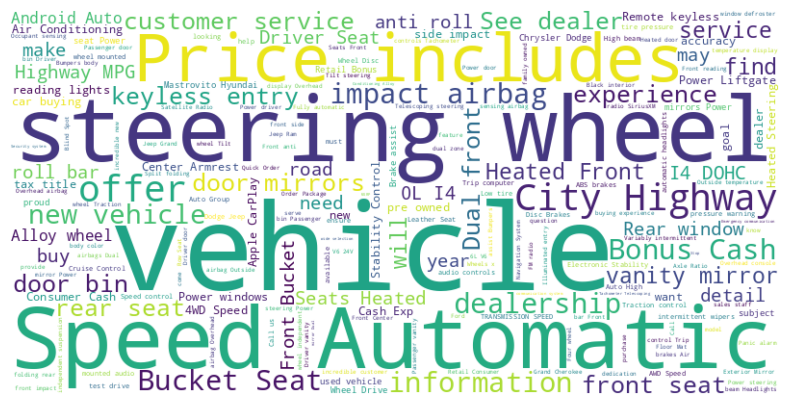

In [66]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataframe
#df = pd.DataFrame({
#    'description': [
#       'Machine learning is powerful',
#       'Deep learning is a subset of machine learning',
#       'Data science uses machine learning'
#    ]
#})

# Combine all text into one string
text = ' '.join(dfvpp_cpy['description'].astype("string"))

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
dfvpp_cpy.drop(['first_4_char','remain_char'], axis=1,inplace=True)

In [68]:
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   string 
 1   description     1002 non-null   string 
 2   make            1002 non-null   string 
 3   model           1002 non-null   string 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   string 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   string 
 9   mileage         1002 non-null   float64
 10  transmission    1002 non-null   string 
 11  trim            1002 non-null   string 
 12  body            1002 non-null   string 
 13  doors           1002 non-null   float64
 14  exterior_color  1002 non-null   string 
 15  interior_color  1002 non-null   string 
 16  drivetrain      1002 non-null   string 
dtypes: float64(4), int64(1), string(1

###Extracting Text Features and prevent data Leakage with train test split

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

####creating another copy of the
dataframe  

df_vpp-->dfvpp_cpy-->dfvpp_cpy1

In [70]:
dfvpp_cpy1=dfvpp_cpy.copy(deep=True)

In [71]:

#Selecting the features
X_tfidf=dfvpp_cpy1.drop('price', axis=1)

#Seperating the target from features
y_tfidf=dfvpp_cpy1['price']

In [72]:
X_tfidf.columns

Index(['name', 'description', 'make', 'model', 'year', 'engine', 'cylinders',
       'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [73]:
y_tfidf

,price
0,74600.0
1,50170.0
2,96410.0
3,46835.0
4,81663.0
...,...
997,59037.0
998,49720.0
999,69085.0
1000,43495.0


###Splitting the dataset in to Train Test set before applying TfIdfVectorizer on the columns

In [74]:
X_Train_Tfidf, X_Test_Tfidf, y_train_Tfidf, y_test_Tfidf=train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

In [75]:
print(X_Train_Tfidf.shape)
print(X_Test_Tfidf.shape)
print(y_train_Tfidf.shape)
print(y_test_Tfidf.shape)

(801, 16)
(201, 16)
(801,)
(201,)


In [76]:
X_Train_Tfidf.columns

Index(['name', 'description', 'make', 'model', 'year', 'engine', 'cylinders',
       'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [77]:
X_Test_Tfidf.columns

Index(['name', 'description', 'make', 'model', 'year', 'engine', 'cylinders',
       'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [78]:
y_train_Tfidf.info()

<class 'pandas.core.series.Series'>
Index: 801 entries, 535 to 102
Series name: price
Non-Null Count  Dtype  
--------------  -----  
801 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [79]:
y_test_Tfidf.info()

<class 'pandas.core.series.Series'>
Index: 201 entries, 521 to 29
Series name: price
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [80]:
X_Train_Tfidf.iloc[0:1,0:16]

,name,description,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
535,2023 Jeep Grand Cherokee Laredo,EquipmentKeep your hands warm ...,Jeep,Grand Cherokee,2023,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,16.0,8-speed automatic,Laredo,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


In [81]:
X_Test_Tfidf.iloc[0:1,0:16]

,name,description,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
521,2024 Jeep Compass Latitude,Unleash Your Adventure: 2024 J...,Jeep,Compass,2024,16V GDI DOHC Turbo,4.0,Gasoline,10.0,8-Speed Automatic,Latitude,SUV,4.0,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive


In [82]:
y_train_Tfidf.iloc[0:1]

,price
535,43000.0


In [83]:
y_test_Tfidf.iloc[0:1]

,price
521,33255.0


###Applying TfIdfVectorizer to training Dataset

In [84]:
X_Train_Tfidf.dtypes

,0
name,string[python]
description,string[python]
make,string[python]
model,string[python]
year,int64
engine,string[python]
cylinders,float64
fuel,string[python]
mileage,float64
transmission,string[python]


In [85]:
X_Test_Tfidf.dtypes

,0
name,string[python]
description,string[python]
make,string[python]
model,string[python]
year,int64
engine,string[python]
cylinders,float64
fuel,string[python]
mileage,float64
transmission,string[python]


In [86]:
Numerical_cols=['year','cylinders','mileage','doors']
Text_cols=['name','description','make','model','engine','fuel','transmission','trim','body','exterior_color','interior_color','drivetrain']

In [87]:
X_Train_Tfidf[Numerical_cols]

,year,cylinders,mileage,doors
535,2023,6.000000,16.0,4.0
697,2024,6.000000,8.0,4.0
557,2024,4.000000,35.0,4.0
644,2024,6.000000,3.0,4.0
598,2023,4.975474,27.0,4.0
...,...,...,...,...
106,2024,8.000000,148.0,4.0
270,2024,3.000000,3.0,4.0
860,2024,6.000000,6.0,4.0
435,2023,8.000000,19.0,4.0


In [88]:
X_Train_Tfidf[Text_cols]

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
535,2023 Jeep Grand Cherokee Laredo,EquipmentKeep your hands warm ...,Jeep,Grand Cherokee,"ar 3.6L V-6 DOHC, variable valve control, regu...",Gasoline,8-speed automatic,Laredo,SUV,Silver Zynith,Global Black,Four-wheel Drive
697,2024 Mercedes-Benz GLS 450 4MATIC,Recent Arrival! Doggett Merced...,Mercedes-Benz,GLS 450,24V GDI DOHC Turbo,Gasoline,9-Speed Automatic,4MATIC,SUV,Polar White,Macchiato Beige,All-wheel Drive
557,2024 Jeep Grand Cherokee 4xe Trailhawk,"2.0L I4 DOHC, 4WD. Diamond Bla...",Jeep,Grand Cherokee 4xe,16V GDI DOHC Turbo Hybrid,Hybrid,8-Speed Automatic,Trailhawk,SUV,Diamond Black,Global Black,Four-wheel Drive
644,2024 Jeep Grand Cherokee L Altitude,Bright White Clearcoat 2024 Je...,Jeep,Grand Cherokee L,"ar 3.6L V-6 DOHC, variable valve control, regu...",Gasoline,Automatic,Altitude,SUV,Bright White Clearcoat,Global Black,Four-wheel Drive
598,2023 Hyundai IONIQ 6 SEL,.,Hyundai,IONIQ 6,c,Electric,1-Speed Automatic,SEL,Sedan,Onyx Black,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024 Chevrolet Silverado 1500 RST,"10-Speed Automatic, 4WD, Black...",Chevrolet,Silverado 1500,16V GDI OHV,Gasoline,Automatic,RST,Pickup Truck,Sterling Gray Metallic,Jet Black,Four-wheel Drive
270,2024 Ford Escape Active,Doing business with Maguire means you'll alway...,Ford,Escape,12V PDI DOHC Turbo,Gasoline,8-Speed Automatic,Active,SUV,Carbonized Gray Metallic,Ebony,All-wheel Drive
860,2024 Ford Expedition King Ranch,"Heated Leather Seats, Navigati...",Ford,Expedition,24V PDI DOHC Twin Turbo,Gasoline,10-Speed Automatic,King Ranch,SUV,Black,Java,Four-wheel Drive
435,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,16V MPFI OHV,Gasoline,8-Speed Automatic,Pursuit,SUV,White Knuckle Clearcoat,Black,All-wheel Drive


In [89]:
X_Test_Tfidf[Numerical_cols]

,year,cylinders,mileage,doors
521,2024,4.0,10.0,4.0
739,2024,4.0,1.0,4.0
823,2024,4.0,1.0,4.0
662,2024,4.0,3.0,4.0
411,2024,4.0,19.0,4.0
...,...,...,...,...
332,2024,4.0,0.0,4.0
208,2024,6.0,5.0,4.0
615,2024,4.0,5.0,4.0
78,2024,6.0,13.0,4.0


In [90]:
X_Test_Tfidf[Text_cols]

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
521,2024 Jeep Compass Latitude,Unleash Your Adventure: 2024 J...,Jeep,Compass,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Latitude,SUV,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive
739,2024 Hyundai Santa Cruz 2.5T NIGHT,Hampton Gray 2024 Hyundai Sant...,Hyundai,Santa Cruz,16V PDI DOHC Turbo,Gasoline,8-Speed Automatic with Auto-Shift,2.5T NIGHT,Pickup Truck,Hampton Gray,Black,All-wheel Drive
823,2024 Hyundai Santa Cruz 2.5T NIGHT,Hampton Gray 2024 Hyundai Sant...,Hyundai,Santa Cruz,16V PDI DOHC Turbo,Gasoline,8-Speed Automatic with Auto-Shift,2.5T NIGHT,Pickup Truck,Hampton Gray,Black,All-wheel Drive
662,2024 Mazda CX-90 PHEV Premium,"At Walser, youll get an except...",Mazda,CX-90 PHEV,DOHC 16V LEV3-SULEV30,PHEV Hybrid Fuel,Automatic,Premium,SUV,Machine,Black,All-wheel Drive
411,2024 Land Rover Discovery Sport Dynamic SE,Land Rover Jaguar San Juan is ...,Land Rover,Discovery Sport,16V GDI DOHC Turbo,Gasoline,9-Speed Automatic,Dynamic SE,SUV,Eiger Grey,Gray,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...
332,2024 Jeep Compass Latitude,24/32 City/Highway MPG2024 Jeep Compass Latitu...,Jeep,Compass,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Latitude,SUV,Metallic,Black,Four-wheel Drive
208,2024 RAM 3500 Laramie Mega Cab 4x4 6'4' Box,Pearl White 2024 Ram 3500 Laramie 4WD Aisin 6-...,RAM,3500,"6.7L I-6 diesel direct injection, VVT intercoo...",Diesel,Aisin 6-Speed Automatic,Laramie Mega Cab 4x4 6&#39;4&#39; Box,Pickup Truck,Pearl White,Black,Four-wheel Drive
615,2024 Cadillac XT5 Luxury,Luxury Stellar Black Metallic 2.0L Turbocharge...,Cadillac,XT5,"gasoline direct injection, DOHC, variable valv...",Gasoline,9-Speed Automatic,Luxury,SUV,Stellar Black Metallic,Jet Black,All-wheel Drive
78,2024 RAM 3500 Tradesman,Bright White Clearcoat 2024 Ra...,RAM,3500,24V DDI OHV Turbo Diesel,Diesel,Automatic,Tradesman,Pickup Truck,Bright White Clearcoat,Black,Four-wheel Drive


###Apply TfIdfVectorizer on Text Columns and StandardScaler on Numerical Columns

In [91]:
Numerical_cols=['year','cylinders','mileage','doors']
Text_cols=['name','description','make','model','engine','fuel','transmission','trim','body','exterior_color','interior_color','drivetrain']

###NUMERICAL COLUMNS - Train - SS

In [92]:
from sklearn.preprocessing import StandardScaler

SS1=StandardScaler()
XTrain_SS_year=SS1.fit_transform(X_Train_Tfidf[['year']])

SS2=StandardScaler()
XTrain_SS_cylinders=SS2.fit_transform(X_Train_Tfidf[['cylinders']])

SS3=StandardScaler()
XTrain_SS_mileage=SS3.fit_transform(X_Train_Tfidf[['mileage']])

SS4=StandardScaler()
XTrain_SS_doors=SS4.fit_transform(X_Train_Tfidf[['doors']])

###Target Price Train

In [93]:

y_train_Tfidf

,price
535,43000.0
697,95230.0
557,67784.0
644,47451.0
598,39997.0
...,...
106,54559.0
270,34799.0
860,86490.0
435,46835.0


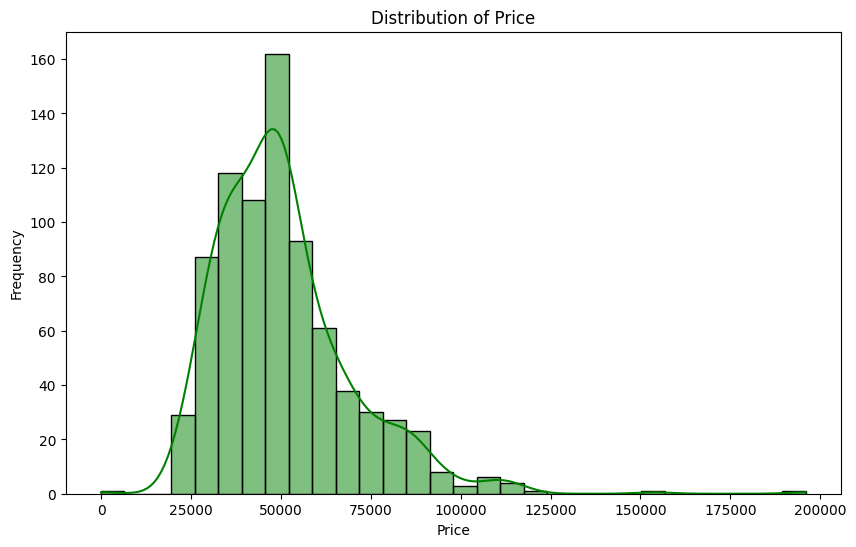

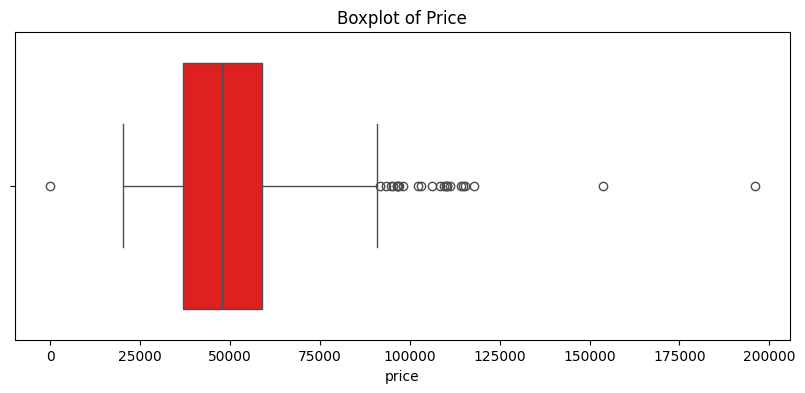

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train_Tfidf, kde=True, bins=30, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Alternative: Boxplot to see outliers and quartiles
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train_Tfidf, color='red')
plt.title('Boxplot of Price')
plt.show()

###NUMERICAL COLUMNS - Test - SS

In [95]:

XTest_SS_year=SS1.transform(X_Test_Tfidf[['year']])

XTest_SS_cylinders=SS2.transform(X_Test_Tfidf[['cylinders']])

XTest_SS_mileage=SS3.transform(X_Test_Tfidf[['mileage']])

XTest_SS_doors=SS4.transform(X_Test_Tfidf[['doors']])

###Target Price Test

In [96]:
y_test_Tfidf

,price
521,33255.0
739,40434.0
823,40375.0
662,54949.0
411,57508.0
...,...
332,35999.0
208,89040.0
615,47225.0
78,63223.0


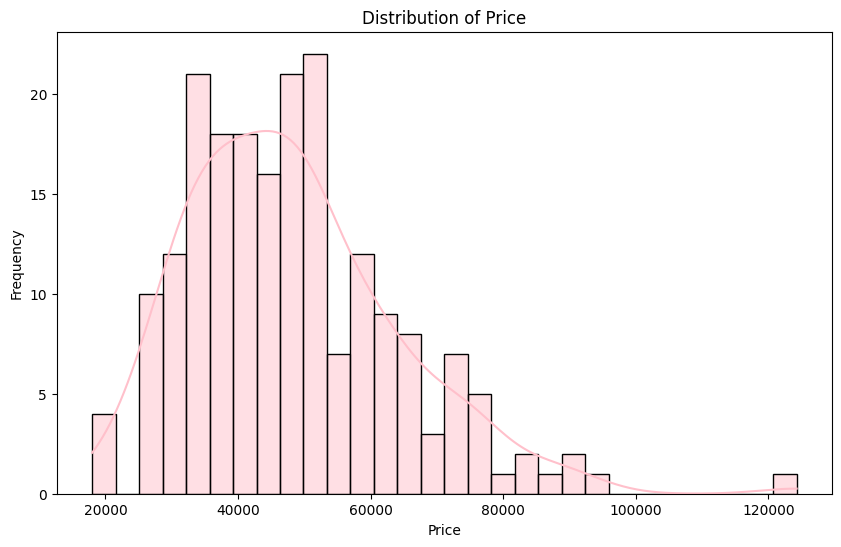

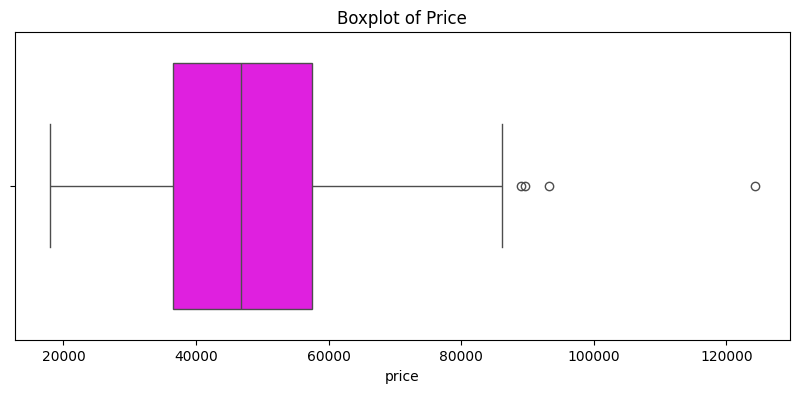

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test_Tfidf, kde=True, bins=30, color='pink')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Alternative: Boxplot to see outliers and quartiles
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_test_Tfidf, color='magenta')
plt.title('Boxplot of Price')
plt.show()

###TEXT COLUMNS - Train -TfIdfVectorizer

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer


Tfidf1= TfidfVectorizer(max_features=100)
XTrain_Tfidf_name= Tfidf1.fit_transform(X_Train_Tfidf['name'])

Tfidf2= TfidfVectorizer(max_features=500)
XTrain_Tfidf_description= Tfidf2.fit_transform(X_Train_Tfidf['description'])

Tfidf3= TfidfVectorizer(max_features=100)
XTrain_Tfidf_make= Tfidf3.fit_transform(X_Train_Tfidf['make'])

Tfidf4= TfidfVectorizer(max_features=100)
XTrain_Tfidf_model= Tfidf4.fit_transform(X_Train_Tfidf['model'])

Tfidf5= TfidfVectorizer(max_features=100)
XTrain_Tfidf_engine= Tfidf5.fit_transform(X_Train_Tfidf['engine'])

Tfidf6= TfidfVectorizer(max_features=100)
XTrain_Tfidf_fuel= Tfidf6.fit_transform(X_Train_Tfidf['fuel'])

Tfidf7= TfidfVectorizer(max_features=100)
XTrain_Tfidf_transmission= Tfidf7.fit_transform(X_Train_Tfidf['transmission'])

Tfidf8= TfidfVectorizer(max_features=100)
XTrain_Tfidf_trim= Tfidf8.fit_transform(X_Train_Tfidf['trim'])

Tfidf9= TfidfVectorizer(max_features=100)
XTrain_Tfidf_body= Tfidf9.fit_transform(X_Train_Tfidf['body'])

Tfidf10= TfidfVectorizer(max_features=100)
XTrain_Tfidf_extcolor= Tfidf10.fit_transform(X_Train_Tfidf['exterior_color'])

Tfidf11= TfidfVectorizer(max_features=100)
XTrain_Tfidf_intcolor= Tfidf11.fit_transform(X_Train_Tfidf['interior_color'])

Tfidf12= TfidfVectorizer(max_features=100)
XTrain_Tfidf_drivetrain= Tfidf12.fit_transform(X_Train_Tfidf['drivetrain'])

###TEXT COLUMNS - Test - TfIdfVectorizer

In [99]:

XTest_Tfidf_name = Tfidf1.transform(X_Test_Tfidf['name'])

XTest_Tfidf_description = Tfidf2.transform(X_Test_Tfidf['description'])

XTest_Tfidf_make = Tfidf3.transform(X_Test_Tfidf['make'])

XTest_Tfidf_model = Tfidf4.transform(X_Test_Tfidf['model'])

XTest_Tfidf_engine = Tfidf5.transform(X_Test_Tfidf['engine'])

XTest_Tfidf_fuel = Tfidf6.transform(X_Test_Tfidf['fuel'])

XTest_Tfidf_transmission = Tfidf7.transform(X_Test_Tfidf['transmission'])

XTest_Tfidf_trim = Tfidf8.transform(X_Test_Tfidf['trim'])

XTest_Tfidf_body = Tfidf9.transform(X_Test_Tfidf['body'])

XTest_Tfidf_extcolor = Tfidf10.transform(X_Test_Tfidf['exterior_color'])

XTest_Tfidf_intcolor = Tfidf11.transform(X_Test_Tfidf['interior_color'])

XTest_Tfidf_drivetrain = Tfidf12.transform(X_Test_Tfidf['drivetrain'])

In [100]:
#Scaled Numerical Train Columns
Scaled_Train_Num_Cols = [XTrain_SS_year, XTrain_SS_cylinders, XTrain_SS_mileage, XTrain_SS_doors]

#Scaled Numerical Test Columns
Scaled_Test_Num_Cols = [XTest_SS_year, XTest_SS_cylinders, XTest_SS_mileage, XTest_SS_doors]

#Vectorized Text Train Columns
Vect_Train_Text_Cols = [XTrain_Tfidf_name, XTrain_Tfidf_description, XTrain_Tfidf_make, XTrain_Tfidf_model, XTrain_Tfidf_engine, XTrain_Tfidf_fuel, XTrain_Tfidf_transmission, XTrain_Tfidf_trim, XTrain_Tfidf_body, XTrain_Tfidf_extcolor, XTrain_Tfidf_intcolor, XTrain_Tfidf_drivetrain]

#Vectorized Text Test Columns
Vect_Test_Text_Cols = [XTest_Tfidf_name, XTest_Tfidf_description,XTest_Tfidf_make, XTest_Tfidf_model, XTest_Tfidf_engine, XTest_Tfidf_fuel, XTest_Tfidf_transmission, XTest_Tfidf_trim, XTest_Tfidf_body, XTest_Tfidf_extcolor, XTest_Tfidf_intcolor, XTest_Tfidf_drivetrain]

In [101]:

#Combined Train Cols after Scaling and Vectorizing
Combined_Train_Cols = [Scaled_Train_Num_Cols, Vect_Train_Text_Cols]

#Combined Test Cols after Scaling and Vectorizing
Combined_Test_Cols = [Scaled_Test_Num_Cols, Vect_Test_Text_Cols]

In [102]:
Scaled_Train_Num_Cols

[array([[-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [-2.94503315],
        [ 0.28643473],
        [ 0.28643473],
        [ 0.28643473],
        [ 0

###Combining Numerical And Text ColsbTo build the model using Scipy.sparse.hstack

In [103]:
'''import numpy as np
from scipy.sparse import hstack, csr_matrix

feature_stack = hstack([
    np.array(XTrain_SS_year).reshape(-1, 1),
    np.array(XTrain_SS_cylinders).reshape(-1, 1),
    np.array(XTrain_SS_mileage).reshape(-1, 1),
    np.array(XTrain_SS_doors).reshape(-1, 1)
])

# 3. Convert to CSR format
Numfeat = csr_matrix(feature_stack)'''

'import numpy as np\nfrom scipy.sparse import hstack, csr_matrix\n\nfeature_stack = hstack([\n    np.array(XTrain_SS_year).reshape(-1, 1),\n    np.array(XTrain_SS_cylinders).reshape(-1, 1),\n    np.array(XTrain_SS_mileage).reshape(-1, 1),\n    np.array(XTrain_SS_doors).reshape(-1, 1)\n])\n\n# 3. Convert to CSR format\nNumfeat = csr_matrix(feature_stack)'

###For Training

In [104]:

import numpy as np
from scipy.sparse import csr_matrix

# Combine columns into one 2D numpy array
combined1 = np.column_stack((XTrain_SS_year, XTrain_SS_cylinders, XTrain_SS_mileage, XTrain_SS_doors))

# Convert to sparse
Numfeat = csr_matrix(combined1)

In [105]:
Numfeat.shape

(801, 4)

In [106]:
XTrain_Tfidf_name.shape

(801, 100)

In [107]:
from scipy.sparse import hstack

combined_feat = hstack([Numfeat, XTrain_Tfidf_name, XTrain_Tfidf_description, XTrain_Tfidf_make, XTrain_Tfidf_model, XTrain_Tfidf_engine, XTrain_Tfidf_fuel, XTrain_Tfidf_transmission, XTrain_Tfidf_trim, XTrain_Tfidf_body, XTrain_Tfidf_extcolor, XTrain_Tfidf_intcolor, XTrain_Tfidf_drivetrain])

In [108]:
combined_feat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 69154 stored elements and shape (801, 1176)>

###For Testing

In [109]:
import numpy as np
from scipy.sparse import csr_matrix

# Combine columns into one 2D numpy array
combined2 = np.column_stack((XTest_SS_year, XTest_SS_cylinders, XTest_SS_mileage, XTest_SS_doors))

NumFeat2 = csr_matrix(combined2)
NumFeat2.shape

(201, 4)

In [110]:
from scipy.sparse import hstack

combined_feat2 = hstack([NumFeat2, XTest_Tfidf_name, XTest_Tfidf_description, XTest_Tfidf_make, XTest_Tfidf_model, XTest_Tfidf_engine, XTest_Tfidf_fuel, XTest_Tfidf_transmission, XTest_Tfidf_trim, XTest_Tfidf_body, XTest_Tfidf_extcolor, XTest_Tfidf_intcolor, XTest_Tfidf_drivetrain])

In [111]:
combined_feat2

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17011 stored elements and shape (201, 1176)>

#------------------

###TFIDF old START

In [ ]:
df_name = TfidfVectorizer(max_features=2000)
dfname = df_name.fit_transform(dfvpp_cpy['name'])

In [ ]:
df_desc = TfidfVectorizer(max_features=2000)
dfdesc = df_desc.fit_transform(dfvpp_cpy['description'])

In [ ]:
df_make = TfidfVectorizer(max_features=2000)
dfmake = df_make.fit_transform(dfvpp_cpy['make'])

In [ ]:
df_model = TfidfVectorizer(max_features=2000)
dfmodel = df_model.fit_transform(dfvpp_cpy['model'])

In [ ]:
df_engine = TfidfVectorizer(max_features=2000)
dfengine = df_engine.fit_transform(dfvpp_cpy['engine'])

In [ ]:
df_fuel = TfidfVectorizer(max_features=2000)
dffuel = df_fuel.fit_transform(dfvpp_cpy['fuel'])

In [ ]:
df_trans = TfidfVectorizer(max_features=2000)
dftrans = df_trans.fit_transform(dfvpp_cpy['transmission'])

In [ ]:
df_trim = TfidfVectorizer(max_features=2000)
dftrim = df_trim.fit_transform(dfvpp_cpy['trim'])

In [ ]:
df_body = TfidfVectorizer(max_features=2000)
dfbody = df_body.fit_transform(dfvpp_cpy['body'])

In [ ]:
df_ecolor = TfidfVectorizer(max_features=2000)
dfecolor = df_ecolor.fit_transform(dfvpp_cpy['exterior_color'])

In [ ]:
df_icolor = TfidfVectorizer(max_features=2000)
dficolor = df_icolor.fit_transform(dfvpp_cpy['interior_color'])

In [ ]:
df_dtrain = TfidfVectorizer(max_features=2000)
dfdtrain = df_dtrain.fit_transform(dfvpp_cpy['drivetrain'])

In [ ]:
dfdesc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 85835 stored elements and shape (1002, 2000)>

In [ ]:
txt_cols=[dfname, dfdesc, dfmake, dfmodel, dfengine, dffuel, dftrans, dftrim, dfbody, dfecolor, dficolor, dfdtrain]

###TFIDF old END

##--------------------

###Seperating the Independent & Dependent Features

#MODEL BUILDING

In [112]:
X = combined_feat
y = y_train_Tfidf

####Model 1:: Linear Regression
________________________________

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr_model=LinearRegression()

In [115]:
lr_model.fit(X, y)

LinearRegression()

In [116]:
lr_model.score(X, y)

0.9997052737288333

####Model Predictions on test dataset

In [117]:
mod1_pred=lr_model.predict(combined_feat2)

In [118]:

import numpy as np

np.set_printoptions(suppress=True, precision=2)
len(mod1_pred)

201

In [119]:
combined_feat2[:1,0:1176]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 133 stored elements and shape (1, 1176)>

In [120]:
pred1=lr_model.predict(combined_feat2[:1,0:1176])
print(pred1)  #33255

[36772.84]


In [121]:
display(combined_feat2[:1,0:1176])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 133 stored elements and shape (1, 1176)>

In [122]:
from sklearn.metrics import r2_score, mean_squared_error

R2= r2_score(y_test_Tfidf, mod1_pred)
print(f'The R² value-Coeff of Determination is found to be::{R2=}')
print()
MSE=mean_squared_error(mod1_pred, y_test_Tfidf)
print(f'The Mean Square Error value-MSE is found to be::{MSE=}')

The R² value-Coeff of Determination is found to be::R2=-0.5455763515066727

The Mean Square Error value-MSE is found to be::MSE=394022023.6888839


In [123]:

lr_model.coef_

array([2922.38, 6917.04, 3696.98, ..., 4549.87, 3168.72, -380.57])

###It is observed that the model performed poorly than an average model, it is essential to identify the necessary features present and build the model again

###Relevant Features for the model Building

In [128]:
features = [
    'year',
    'mileage',
    'cylinders',
    'doors',
    'make',
    'fuel',
    'transmission',
    'body',
    'drivetrain',
    #'price'
]

In [129]:
dfvpp_cpy1[features]

,year,mileage,cylinders,doors,make,fuel,transmission,body,drivetrain
0,2024,10.0,6.0,4.0,Jeep,Gasoline,8-Speed Automatic,SUV,Four-wheel Drive
1,2024,1.0,6.0,4.0,Jeep,Gasoline,8-Speed Automatic,SUV,Four-wheel Drive
2,2024,0.0,8.0,4.0,GMC,Gasoline,Automatic,SUV,Four-wheel Drive
3,2023,32.0,8.0,4.0,Dodge,Gasoline,8-Speed Automatic,SUV,All-wheel Drive
4,2024,10.0,6.0,4.0,RAM,Diesel,6-Speed Automatic,Pickup Truck,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...
997,2024,10.0,4.0,3.0,Mercedes-Benz,Diesel,9-Speed Automatic,Cargo Van,Rear-wheel Drive
998,2024,0.0,4.0,4.0,Dodge,Gasoline,6-Spd Aisin F21-250 PHEV Auto Trans,SUV,All-wheel Drive
999,2024,20.0,6.0,4.0,Jeep,Gasoline,8-Speed Automatic,SUV,Four-wheel Drive
1000,2024,6.0,6.0,4.0,Nissan,Gasoline,Automatic,SUV,All-wheel Drive


In [130]:
dfvpp_cpy1[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1002 non-null   int64  
 1   mileage       1002 non-null   float64
 2   cylinders     1002 non-null   float64
 3   doors         1002 non-null   float64
 4   make          1002 non-null   string 
 5   fuel          1002 non-null   string 
 6   transmission  1002 non-null   string 
 7   body          1002 non-null   string 
 8   drivetrain    1002 non-null   string 
dtypes: float64(3), int64(1), string(5)
memory usage: 70.6 KB


In [131]:
dfvpp_cpy1['price']

,price
0,74600.0
1,50170.0
2,96410.0
3,46835.0
4,81663.0
...,...
997,59037.0
998,49720.0
999,69085.0
1000,43495.0


In [132]:

#RANDOMFOREST MODEL

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

X = dfvpp_cpy1[features]
y = dfvpp_cpy1['price']

num_features = ['year','mileage','cylinders','doors']
cat_features = ['make','fuel','transmission','body','drivetrain']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

modelLR = Pipeline([
    ('prep', preprocess),
    ('rf', RandomForestRegressor(n_estimators=200))
])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

modelLR.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage',
                                                   'cylinders', 'doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel',
                                                   'transmission', 'body',
                                                   'drivetrain'])])),
                ('rf', RandomForestRegressor(n_estimators=200))])

In [133]:
print(X)

      year  mileage  cylinders  doors           make      fuel  \
0     2024     10.0        6.0    4.0           Jeep  Gasoline   
1     2024      1.0        6.0    4.0           Jeep  Gasoline   
2     2024      0.0        8.0    4.0            GMC  Gasoline   
3     2023     32.0        8.0    4.0          Dodge  Gasoline   
4     2024     10.0        6.0    4.0            RAM    Diesel   
...    ...      ...        ...    ...            ...       ...   
997   2024     10.0        4.0    3.0  Mercedes-Benz    Diesel   
998   2024      0.0        4.0    4.0          Dodge  Gasoline   
999   2024     20.0        6.0    4.0           Jeep  Gasoline   
1000  2024      6.0        6.0    4.0         Nissan  Gasoline   
1001  2024     31.0        8.0    4.0      Chevrolet  Gasoline   

                             transmission          body        drivetrain  
0                       8-Speed Automatic           SUV  Four-wheel Drive  
1                       8-Speed Automatic           SUV

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 9)
(201, 9)
(801,)
(201,)


In [135]:
predictionLR = modelLR.predict(X_test)

In [136]:
len(predictionLR)

201

In [137]:
predictionLR

array([ 37503.58,  42164.76,  42164.76,  56110.9 ,  48779.04,  58602.34,
        49700.8 ,  55303.33,  69715.21,  36642.84,  47818.87,  34050.98,
        37578.74,  50198.88,  52259.43,  67597.11,  39650.9 ,  35985.34,
        59858.45,  45464.99,  25105.45,  48361.81, 105280.37,  52998.16,
        47611.11,  37469.45,  43806.37,  61077.19,  49045.76,  50227.37,
        48023.03,  33501.88,  54970.65,  47832.44,  48137.91,  43772.39,
        55087.36,  37835.98,  64268.09,  71364.99,  74334.82,  72944.82,
        48779.04,  41817.23,  63398.47,  55309.63,  43963.62,  34200.03,
        48003.58,  38259.94,  25747.6 ,  47074.93,  67496.41,  35571.53,
        39655.26,  46822.53,  73381.57,  36659.88,  38280.41,  37306.45,
        46910.05,  48939.34,  37070.59,  55106.03,  49221.91,  33963.75,
        42164.76,  69715.21,  28725.47,  49776.54,  65524.1 ,  35985.34,
        47167.03,  60811.49,  47317.32,  65986.51,  29785.95,  39655.26,
        33475.53,  85667.45,  69913.6 ,  29546.59, 

In [138]:
from sklearn.metrics import r2_score, mean_squared_error

R2= r2_score(y_test, predictionLR)
print(f'The R² value-Coeff of Determination is found to be::{R2=}')
print()
MSE=mean_squared_error(predictionLR, y_test)
print(f'The Mean Square Error value-MSE is found to be::{MSE=}')

The R² value-Coeff of Determination is found to be::R2=0.6422976268811083

The Mean Square Error value-MSE is found to be::MSE=91190974.03193767


In [139]:

import numpy as np
RMSE= np.sqrt(MSE)
print(f" The Root Mean Squared Error is :{RMSE=}")

 The Root Mean Squared Error is :RMSE=np.float64(9549.396527107756)


##Predicting Inference from Model for Example Case

In [140]:

from array import array
ex_case=np.array([[2025, 25, 6, 4, 'RAM', 'Gasoline', '9-Speed Automatic', 'Pickup Truck', 'All-Wheel Drive']], dtype=object)
ex_case

array([[2025, 25, 6, 4, 'RAM', 'Gasoline', '9-Speed Automatic',
        'Pickup Truck', 'All-Wheel Drive']], dtype=object)

In [ ]:
print(modelLR.predict(ex_case))

ValueError: Specifying the columns using strings is only supported for dataframes.

In [141]:

import pandas as pd

ex_case = pd.DataFrame([{
    'year': 2025,
    'mileage': 25,
    'cylinders': 6,
    'doors': 4,
    'make': 'RAM',
    'fuel': 'Gasoline',
    'transmission': '9-Speed Automatic',
    'body': 'Pickup Truck',
    'drivetrain': 'All-Wheel Drive'
}])

print(modelLR.predict(ex_case))

[42279.28]


In [147]:

feature_names = modelLR['prep'].get_feature_names_out()

importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importances_df.head(15))

                                feature  importance
2                        num__cylinders    0.301165
1                          num__mileage    0.136965
6                         cat__make_BMW    0.080599
25              cat__make_Mercedes-Benz    0.062716
36                   cat__fuel_Gasoline    0.048352
81     cat__drivetrain_Four-wheel Drive    0.042008
5                        cat__make_Audi    0.041354
82    cat__drivetrain_Front-wheel Drive    0.028783
32                     cat__fuel_Diesel    0.028014
13                        cat__make_GMC    0.016681
24                      cat__make_Mazda    0.015208
67          cat__transmission_Automatic    0.015200
16                    cat__make_Hyundai    0.013505
55  cat__transmission_8-Speed Automatic    0.012993
80      cat__drivetrain_All-wheel Drive    0.009608


<Axes: ylabel='feature'>

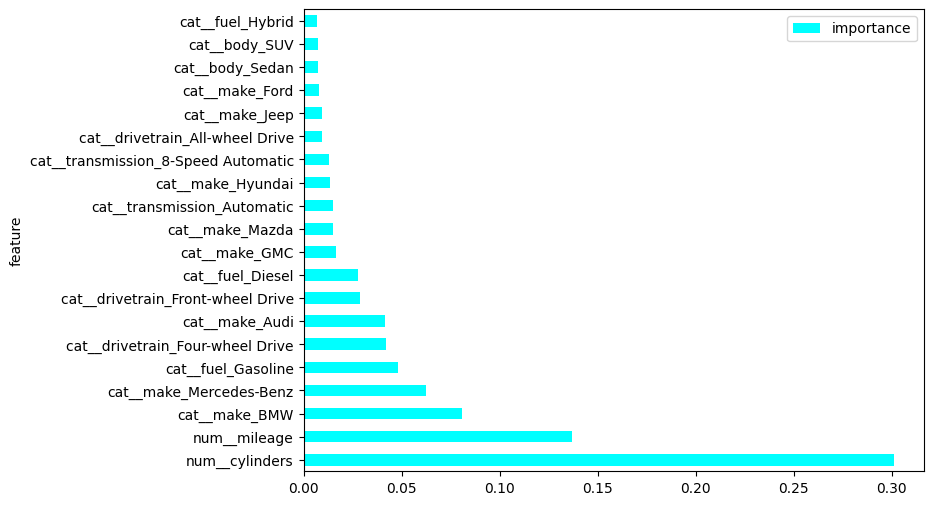

In [148]:
importances = modelLR['rf'].feature_importances_

importances_df.head(20).plot(color='cyan',
    kind='barh', x='feature', y='importance', figsize=(8,6)
)

In [149]:

from sklearn.inspection import permutation_importance

r = permutation_importance(
    modelLR, X_test, y_test, n_repeats=10, random_state=42
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': r.importances_mean
}).sort_values(by='importance', ascending=False)

print(perm_df)

        feature  importance
2     cylinders    0.483927
4          make    0.293841
5          fuel    0.292632
8    drivetrain    0.195355
1       mileage    0.108650
6  transmission    0.105930
7          body    0.008174
0          year    0.001590
3         doors   -0.000025


In [150]:

#LINEAR REGRESSION MODEL

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = dfvpp_cpy1[features]
y = dfvpp_cpy1['price']

num_features = ['year','mileage','cylinders','doors']
cat_features = ['make','fuel','transmission','body','drivetrain']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_lr = Pipeline([
    ('prep', preprocess),
    ('lr', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_lr.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage',
                                                   'cylinders', 'doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel',
                                                   'transmission', 'body',
                                                   'drivetrain'])])),
                ('lr', LinearRegression())])

In [151]:
Pred_lr = model_lr.predict(X_test)

In [152]:
print(model_lr.predict(ex_case))

[59291.67]


###Ordinary Least Squares OLS

In [188]:

import pandas as pd
import statsmodels.api as sm

# ---------------------------
# Load your dataset
# ---------------------------
#df = pd.read_csv("data.csv")   # replace with your file path

# ---------------------------
# Define features and target
# ---------------------------
X = dfvpp_cpy1[features]  # independent variables
y = dfvpp_cpy1['price']         # Target                      # dependent variable

X = pd.get_dummies(X, drop_first=True)

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=y.name)
y = data[y.name]

X=X.astype(int)
#print(y)
# ---------------------------
# Add constant (intercept)
# ---------------------------
X = sm.add_constant(X)

# ---------------------------
# Build OLS model
# ---------------------------
modelOLS1 = sm.OLS(y, X).fit()

# ---------------------------
# Results summary
# ---------------------------
print(modelOLS1.summary())

# ---------------------------
# Predictions
# ---------------------------
predictions = modelOLS1.predict(X)
print(predictions.head())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     22.64
Date:                Wed, 28 Jan 2026   Prob (F-statistic):          5.82e-170
Time:                        01:32:28   Log-Likelihood:                -10707.
No. Observations:                1002   AIC:                         2.158e+04
Df Residuals:                     918   BIC:                         2.200e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [189]:
print('Params/Coefficients')
print('--'*30)
print(modelOLS.params)  # coefficients
print('--'*30)
print('P-Values:')
print(modelOLS.pvalues)    # p-values
print('--'*30)
print('R2:')
print(modelOLS.rsquared)     # R²
print('--'*30)
print('R2 Adjusted:')
print(modelOLS.rsquared_adj)  # Adjusted R²
print('--'*30)
print('Akaike Info Criterion' )
print(modelOLS.aic)          # AIC
print('--'*30)
print('Bayesian Info Criterion' )
print(modelOLS.bic)         # BIC
print('--'*30)

Params/Coefficients
------------------------------------------------------------
const                                                      -2.099454e+07
year                                                        1.039467e+04
mileage                                                     3.558980e+00
cylinders                                                   6.226359e+03
doors                                                       2.669037e+03
fuel_Diesel (B20 capable)                                  -3.870374e+03
fuel_E85 Flex Fuel                                         -3.119942e+04
fuel_Electric                                              -3.836030e+03
fuel_Gasoline                                              -2.666764e+04
fuel_Hybrid                                                -1.570550e+04
fuel_PHEV Hybrid Fuel                                      -1.082613e+04
transmission_1-Speed Automatic                             -7.759139e+03
transmission_1-Speed CVT with Overdrive    

###Building OLS model again with reduced features

In [190]:

reduced_features = [
    'year',
    'mileage',
    'cylinders',
    'doors',
    'fuel',
    'transmission',
    'body'
]

In [198]:
import pandas as pd
import statsmodels.api as sm

# ---------------------------
# Load your dataset
# ---------------------------
#df = pd.read_csv("data.csv")   # replace with your file path

# ---------------------------
# Define features and target
# ---------------------------
X = dfvpp_cpy1[reduced_features]  # independent variables
y = dfvpp_cpy1['price']         # Target                      # dependent variable

X = pd.get_dummies(X, drop_first=True)

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=y.name)
y = data[y.name]

X=X.astype(int)
#print(y)
# ---------------------------
# Add constant (intercept)
# ---------------------------
X = sm.add_constant(X)

# ---------------------------
# Build OLS model
# ---------------------------
modelOLS2 = sm.OLS(y, X).fit()

# ---------------------------
# Results summary
# ---------------------------
print(modelOLS2.summary())

# ---------------------------
# Predictions
# ---------------------------
predictions = modelOLS2.predict(X)
print(predictions.head())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     14.95
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           7.67e-92
Time:                        01:40:51   Log-Likelihood:                -10961.
No. Observations:                1002   AIC:                         2.203e+04
Df Residuals:                     948   BIC:                         2.230e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [199]:

print('--'*30)
print('R2 Adjusted:')
print(modelOLS2.rsquared_adj)  # Adjusted R²
print('--'*30)
print('Akaike Info Criterion' )
print(modelOLS2.aic)          # AIC
print('--'*30)
print('Bayesian Info Criterion' )
print(modelOLS2.bic)         # BIC
print('--'*30)

------------------------------------------------------------
R2 Adjusted:
0.4248759803455594
------------------------------------------------------------
Akaike Info Criterion
22030.420465940682
------------------------------------------------------------
Bayesian Info Criterion
22295.547143149503
------------------------------------------------------------


### first model is better
###Second model loses too much information
###AIC/BIC are working correctly

###OLS Checking Multicollinearity

In [174]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values('VIF', ascending=False).head(10))

                                      feature           VIF
32                  fuel_Diesel (B20 capable)           inf
42  transmission_10-Speed Shiftable Automatic           inf
0                                       const  7.980524e+07
56             transmission_8-Speed Automatic  4.632455e+02
69                     transmission_Automatic  3.782007e+02
46             transmission_6-Speed Automatic  1.862832e+02
38             transmission_1-Speed Automatic  1.369763e+02
65             transmission_9-Speed Automatic  1.230274e+02
40            transmission_10-Speed Automatic  1.161217e+02
70                 transmission_Automatic CVT  8.760381e+01


In [ ]:

#XGBOOST REGRESSOR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

X = dfvpp_cpy1[features]
y = dfvpp_cpy1['price']

num_features = ['year','mileage','cylinders','doors']
cat_features = ['make','fuel','transmission','body','drivetrain']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_xgb = Pipeline([
    ('prep', preprocess),
    ('xgb', XGBRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_xgb.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage',
                                                   'cylinders', 'doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel',
                                                   'transmission', 'body',
                                                   'drivetrain'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=Non...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
Pred_xgb = model_xgb.predict(X_test)

In [ ]:
print(model_xgb.predict(ex_case))

[52482.83]


#### Model 2:: Ridge Regression
_____________________________________

In [ ]:

import numpy as np
from sklearn.linear_model import Ridge

stack_X = np.column_stack([Pred_xgb, Pred_lr, predictionLR])

meta_model = Ridge(alpha=1.0)

In [ ]:

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

meta_model = Pipeline([
    ('prep', preprocess),
    ('ridge', Ridge(alpha=1.0))
])

In [ ]:
meta_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage',
                                                   'cylinders', 'doors']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel',
                                                   'transmission', 'body',
                                                   'drivetrain'])])),
                ('ridge', Ridge())])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

stack_X_train = np.column_stack([
    modelLR.predict(X_train),
    model_lr.predict(X_train),
    model_xgb.predict(X_train)
])

meta_model.fit(stack_X_train, y_train)

stack_X = pd.DataFrame(stack_X, columns=['Pred_xgb', 'Pred_lr', 'predictionLR'])
#stack_X = pd.DataFrame(stack_X, columns=num_features + cat_features)

from sklearn.linear_model import Ridge

meta_model = Ridge(alpha=1.0)   # NO preprocessing
meta_model.fit(stack_X_train, y_train)


final_pred = meta_model.predict(stack_X)

In [ ]:
final_pred

array([ 35610.9 ,  42099.02,  42099.02,  55730.94,  49962.26,  58506.28,
        48150.59,  55725.67,  69733.52,  37003.28,  47555.15,  33867.37,
        36838.25,  52326.74,  52077.98,  68387.06,  37452.57,  34689.46,
        59786.44,  46097.98,  22547.32,  48190.48, 104904.26,  52018.15,
        46418.56,  38154.8 ,  43870.99,  59089.58,  48906.15,  51698.16,
        47632.36,  33548.5 ,  57458.92,  47220.77,  48626.15,  43973.3 ,
        56075.32,  36254.69,  64476.56,  72338.63,  68887.15,  72799.72,
        49962.26,  42627.06,  62116.43,  55371.28,  43917.04,  35149.4 ,
        51479.04,  36490.89,  24927.52,  42194.53,  69736.55,  35027.86,
        38808.3 ,  49034.61,  73929.13,  34449.57,  37957.75,  37969.8 ,
        46294.83,  48140.8 ,  35858.41,  55649.24,  49149.55,  33483.64,
        42099.02,  69733.52,  28427.56,  50071.35,  64229.29,  34616.03,
        48085.43,  61046.  ,  46643.31,  66944.45,  27316.51,  38808.3 ,
        32443.59,  87093.44,  71176.59,  27390.36, 

In [ ]:


ex_df = pd.DataFrame(ex_case, columns=[
    'year', 'mileage', 'cylinders', 'doors',
    'make', 'fuel', 'transmission', 'body', 'drivetrain'
])
print(ex_df.shape)

p1 =  modelLR.predict(ex_df),
p2 =  model_lr.predict(ex_df),
p3 =  model_xgb.predict(ex_df)

stack_ex = np.column_stack([p1, p2, p3])

meta_model.predict(stack_ex)

(1, 9)


array([48213.73])


#### Model 3:: Lasso Regression
_______________________________________

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_lasso = Pipeline([
    ('prep', preprocess),
    ('lasso', Lasso(alpha=0.1))
])

model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)
y_pred[0]

np.float64(45866.963396941785)

In [ ]:
ex_df = pd.DataFrame(ex_case, columns=[
    'year', 'mileage', 'cylinders', 'doors',
    'make', 'fuel', 'transmission', 'body', 'drivetrain'
])

In [ ]:
model_lasso.predict(ex_df)

array([60049.13])

###Lasso with Cross Validation

In [ ]:

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(
    alphas=[0.001, 0.01, 0.1, 1, 10],
    cv=5
)

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_lassocv = Pipeline([
    ('prep', preprocess),
    ('lassocv', lasso_cv)
])

model_lassocv.fit(X_train, y_train)

best_alpha = model_lassocv.named_steps['lassocv'].alpha_
print(best_alpha)

10.0


####Model 4:: ElasticNet Regression
_______________________________________

In [ ]:

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_ENet = Pipeline([
    ('prep', preprocess),
    #('scaler', StandardScaler()),
    ('elastic', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

model_ENet.fit(X_train, y_train)
y_pred = model_ENet.predict(X_test)

In [ ]:
print(model_ENet.predict(ex_df))

[63575.08]


###ElasticNet with Cross Validation

In [ ]:

from sklearn.linear_model import ElasticNetCV

enet_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
    alphas=[0.001, 0.01, 0.1, 1, 10],
    cv=5
)

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_ENetCV = Pipeline([
    ('prep', preprocess),
    #('scaler', StandardScaler()),
    ('elastic', enet_cv)
])

model_ENetCV.fit(X_train, y_train)

best_l1 = model_ENetCV.named_steps['elastic'].l1_ratio_
best_alpha = model_ENetCV.named_steps['elastic'].alpha_

print(best_l1, best_alpha)

0.7 0.01


####Model 5:: (ANN)Neural Network Model for Prices
________________________________________

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

X_train_t = preprocess.fit_transform(X_train)
X_test_t  = preprocess.transform(X_test)

print(X_train_t.shape[1])   # → 84

modelANN = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_t.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)   # price output
])
modelANN.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

history = modelANN.fit(X_train_t, y_train, epochs=50, batch_size=32, validation_split=0.2)

pred = modelANN.predict(X_test_t)

print(pred)
'''
model_ANN.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)'''

84
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2988602368.0000 - mae: 51064.9180 - val_loss: 2776614912.0000 - val_mae: 49864.1406
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2928242432.0000 - mae: 50893.7422 - val_loss: 2776341248.0000 - val_mae: 49861.4375
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3032417024.0000 - mae: 51602.2109 - val_loss: 2775596032.0000 - val_mae: 49854.1055
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3088457216.0000 - mae: 51585.2383 - val_loss: 2773749504.0000 - val_mae: 49835.8516
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3029028864.0000 - mae: 51337.3242 - val_loss: 2769695488.0000 - val_mae: 49795.7148
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2956495104.0000 - mae: 50455.1836 - val_loss: 2761731072.0000 - val_mae: 49716.5547
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2952252160.0000 - mae: 50399.4688 - val_loss: 2747499264.0000 - val_mae: 49574.8

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[ 48269.43]
 [ 40399.56]
 [ 40399.56]
 [ 50453.83]
 [ 45177.49]
 [ 58412.41]
 [ 46335.39]
 [ 67116.41]
 [ 59281.06]
 [ 44639.25]
 [ 53171.67]
 [ 36204.36]
 [ 45575.97]
 [ 59285.31]
 [ 52774.37]
 [ 68412.15]
 [ 60969.02]
 [ 45848.39]
 [ 51822.81]
 [ 46441.41]
 [ 29510.13]
 [ 46101.26]
 [116749.05]
 [ 52500.08]
 [ 60460.5 ]
 [ 42518.1 ]
 [ 46041.7 ]
 [ 51797.29]
 [ 40837.09]
 [ 60713.85]
 [ 59289.57]
 [ 40470.03]
 [ 42681.87]
 [ 55982.94]
 [ 46084.24]
 [ 46045.96]
 [ 48963.72]
 [ 35545.22]
 [ 49500.66]
 [ 60410.7 ]
 [ 61641.66]
 [ 46822.43]
 [ 45177.49]
 [ 47054.86]
 [ 66454.43]
 [ 50479.36]
 [ 41872.  ]
 [ 39356.71]
 [ 57380.72]
 [ 43056.8 ]
 [ 29501.62]
 [ 47123.04]
 [ 59557.72]
 [ 41570.31]
 [ 48473.45]
 [ 40206.2 ]
 [ 68369.61]
 [ 48226.89]
 [ 45592.99]
 [ 44441.78]
 [ 57457.3 ]
 [ 65215.19]
 [ 48628.38]
 [ 56012.71]
 [ 59264.05]
 [ 42478.84]
 [ 40399.56]
 [ 59281.06]
 [ 30639.14]
 [ 53737.82]
 [ 54082.39]
 [ 45661.05]
 [ 54087.3 ]
 [ 56963.59]


"\nmodel_ANN.compile(\n    optimizer=Adam(learning_rate=0.001),\n    loss='mse',\n    metrics=['mae']\n)"

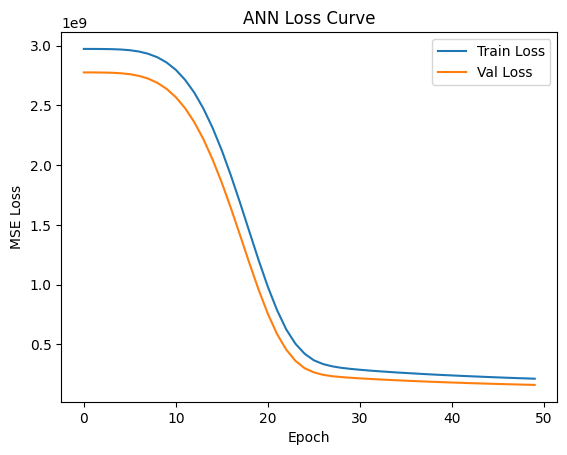

In [ ]:

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('ANN Loss Curve')
plt.legend()
plt.show()

In [ ]:
'''model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)'''

'''ex_dff=preprocess.fit_transform(ex_df)
ex_dff.shape[1]'''

ex_transformed = preprocess.transform(ex_df)
print(ex_transformed.shape)
# (1, 84) ✅ matches ANN input

print(modelANN.predict(ex_transformed))

(1, 9)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_24" is incompatible with the layer: expected axis -1 of input shape to have value 84, but received input with shape (1, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 9), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

###Alternate SciKeras KerasRegressor

In [ ]:

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline

def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss="mse", metrics=["mae"])
    return model

ann = KerasRegressor(model=build_model, epochs=50, batch_size=32)

model_ANN = Pipeline([
    ('prep', preprocess),
    ('ann', ann)
])

model_ANN.fit(X_train, y_train)
pred = model_ANN.predict(X_test)

####Model 6:: XGBoost
_____________________________________

In [ ]:

import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred[0]

np.float32(-0.945554)

####Model 7:: CatBoost
_______________________________________

In [ ]:
!pip install --upgrade catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostRegressor

cat_features = ['brand', 'model', 'fuel_type', 'transmission']

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=100
)

model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    #eval_set=(X_val, y_val)
)

y_pred = model.predict(X_test)

0:	learn: 1.0109431	total: 505ms	remaining: 8m 24s
100:	learn: 0.4556800	total: 25.5s	remaining: 3m 47s
200:	learn: 0.2824229	total: 50.2s	remaining: 3m 19s
300:	learn: 0.1967153	total: 1m 18s	remaining: 3m 1s
400:	learn: 0.1538151	total: 1m 43s	remaining: 2m 34s
500:	learn: 0.1253029	total: 2m 8s	remaining: 2m 7s
600:	learn: 0.1073830	total: 2m 33s	remaining: 1m 41s
700:	learn: 0.0929487	total: 2m 58s	remaining: 1m 16s
800:	learn: 0.0824682	total: 3m 23s	remaining: 50.5s
900:	learn: 0.0728789	total: 3m 48s	remaining: 25.1s
999:	learn: 0.0645266	total: 4m 13s	remaining: 0us


In [ ]:
y_pred[0]

np.float64(-0.9335847599382512)

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,1,26.814842
1,2631,5.968310
2,2656,4.462853
3,15,3.342960
4,3073,2.131213
...,...,...
3072,3065,0.000000
3073,3066,0.000000
3074,3069,0.000000
3075,3070,0.000000


####Model 8:: LightGBM
______________________________________

In [ ]:

import lightgbm as lgb

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:

model.fit(
    X_train, y_train,
    #eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    #early_stopping_rounds=50,
    #verbose=100
)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20000
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 962
[LightGBM] [Info] Start training from score 0.027761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#X['fuel_type'] = X['fuel_type'].astype('category')

In [ ]:
model = lgb.LGBMRegressor(categorical_feature=['brand','fuel_type'])

In [ ]:
#lgb.plot_importance(model, max_num_features=15)
import shap
#shap.TreeExplainer(model).shap_values(X_sample)

####Model 9:: Random Forest Regressor
________________________________________

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
'''
X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)'''

"\nX = df.drop('price', axis=1)\ny = df['price']\n\nX = pd.get_dummies(X, drop_first=True)\n\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, random_state=42\n)"

In [ ]:

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [ ]:
rf_model.predict(new_df[:1,:])

array([1.47419706])

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)# squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.5596036802500604
RMSE: 0.5167300665925111
R²: 0.30815906319001296


####Model 10:: Decision Tree Regressor
______________________________________

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

dt_model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)# squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.2891559960045579
RMSE: 0.2286142474369148
R²: 0.6939123435223044


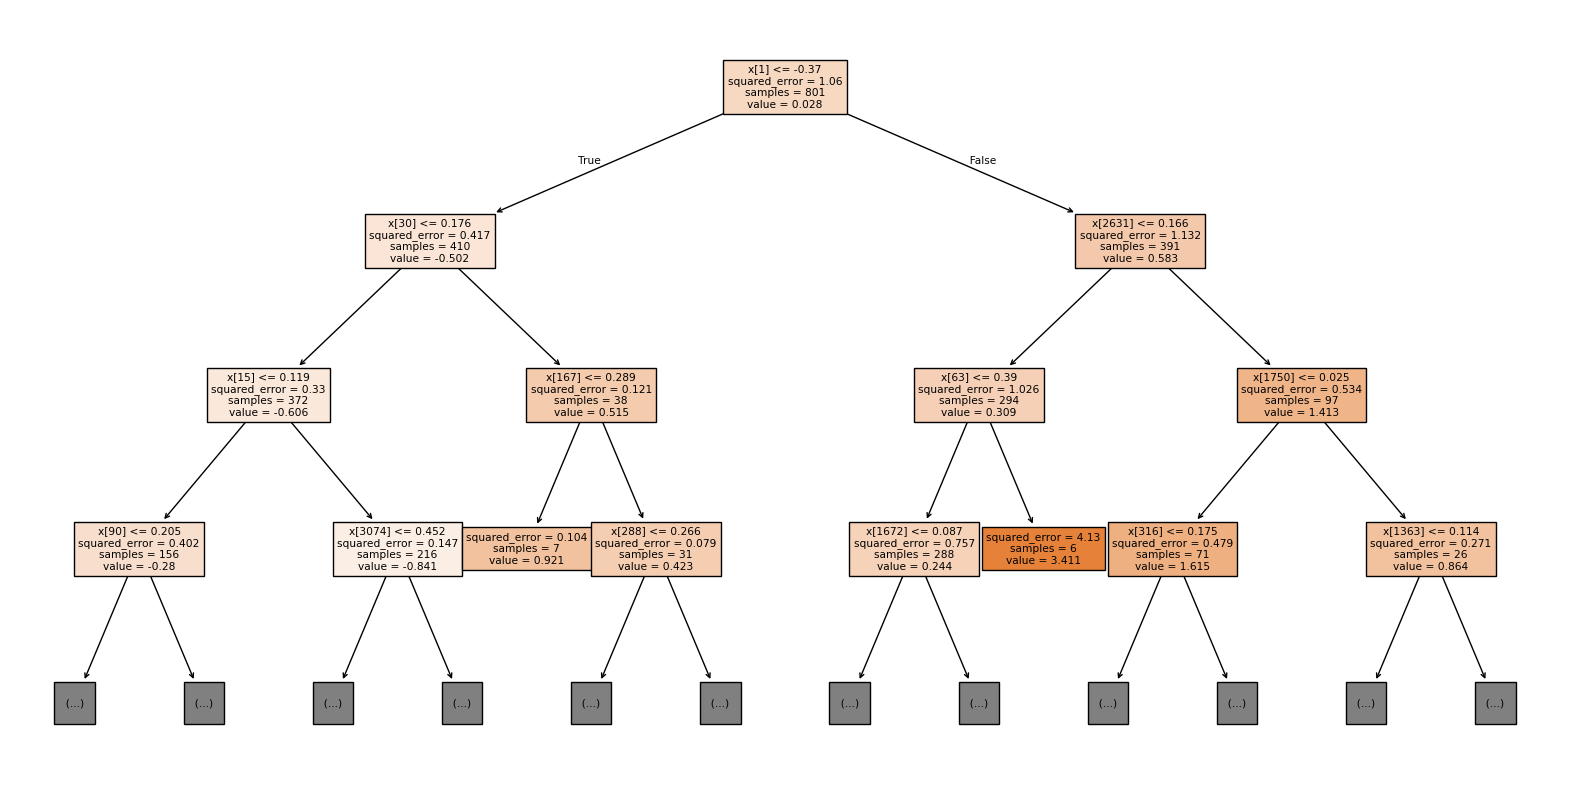

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    #feature_names=X.columns,
    filled=True,
    max_depth=3
)
plt.show()

####Model 11:: KNNRegressor
______________________________________

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=2
)

knn_model.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 21)}

grid = GridSearchCV(
    KNeighborsRegressor(weights='distance'),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error'
)

grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']

####Model 12:: SVMRegressor
________________________________________

In [ ]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Both X and y must be scaled.

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [ ]:

svr_model = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1,
    gamma='scale'
)

svr_model.fit(X_train, y_train)

SVR(C=100)

In [ ]:

y_pred_scaled = svr_model.predict(X_test)
#y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

####Model 13:: GridSearchCV with StratifiedKFold
_______________________________________

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [15, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

###Model 14: Polynomial Regression
______________________________________

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:

poly = PolynomialFeatures(degree=3, include_bias=False)

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model_poly = Pipeline([
    ('prep', preprocess),
    ('poly', poly)
])

X_train_poly = model_poly.fit_transform(X_train)
X_test_poly = model_poly.transform(X_test)

In [ ]:

modelLRP = LinearRegression()
modelLRP.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = modelLRP.predict(X_test_poly)
#print(y_pred)

###Exploratory Data Analysis